In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyspk.model as spk
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

plt.rcParams['axes.labelsize']        = 12
plt.rcParams['axes.titlesize']        = 12
plt.rcParams['xtick.labelsize']       = 12
plt.rcParams['ytick.labelsize']       = 12
plt.rcParams['font.family']           = 'serif'
plt.rcParams['font.size']             = 12

The aim of this notebook is to compare different models of baryonic feedback on the power spectrum, as well as to compare the predictions from two different hydrodynamical simulations.

In [2]:
# Loading in hydro and DMO power spectra for C-OWLS AGN with T_heat=8.7 and Bahamas with T_heat = 7.6
z_cowls, k_cowls, Pk_cowls, dsq_cowls = np.loadtxt('hydrosim_spectra/powtable_C-OWLS_AGN_Theat8.7_Planck2013.dat.txt', unpack=True)
idx_cowls = np.where(z_cowls == 0.5)
idx_krange = np.where(k_cowls[idx_cowls]<2)
idx_krange_2 = np.where(k_cowls[idx_cowls][idx_krange]>0.1)
z_cowls_dmo, k_cowls_dmo, Pk_cowls_dmo, dsq_cowls_dmo = np.loadtxt('hydrosim_spectra/powtable_DMONLY_Planck2013_L400N1024.dat.txt', unpack=True)

z_bahamas, k_bahamas, Pk_bahamas, dsq_bahamas = np.loadtxt('hydrosim_spectra/powtable_BAHAMAS_Theat7.6_nu0_WMAP9.dat.txt', unpack=True)
idx_bahamas = np.where(z_bahamas == 0.5)
z_bahamas_dmo, k_bahamas_dmo, Pk_bahamas_dmo, dsq_bahamas_dmo = np.loadtxt('hydrosim_spectra/powtable_DMONLY_2fluid_nu0_WMAP9_L400N1024.dat.txt', unpack=True)

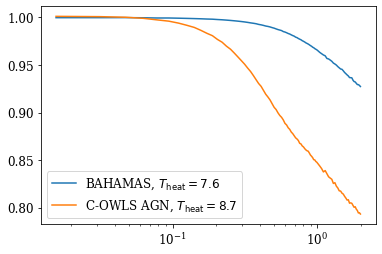

In [ ]:
# Getting ratio of power spectra
pk_ratio_bahamas = Pk_bahamas[idx_cowls][idx_krange]/Pk_bahamas_dmo[idx_cowls][idx_krange]
pk_ratio_cowls = Pk_cowls[idx_cowls][idx_krange]/Pk_cowls_dmo[idx_cowls][idx_krange]

plt.semilogx(k_bahamas[idx_cowls][idx_krange], pk_ratio_bahamas, label=r'BAHAMAS, $T_{\rm heat}=7.6$')
plt.semilogx(k_cowls[idx_cowls][idx_krange], pk_ratio_cowls, label=r'C-OWLS AGN, $T_{\rm heat}=8.7$')
plt.legend()
plt.show()

In [ ]:
# Our 3 models
def spk_power_fn(kk, fb_a, fb_pow):
    k, ratio = spk.sup_model(SO=200, z=0.25, fb_a=fb_a, fb_pow=fb_pow, fb_pivot=10**13.5, k_max=2)
    interp = interp1d(k, ratio)
    return interp(kk)

def A_mod_model(k, Amod, cnl):
    return (1+Amod*cnl*k**2)/(1+cnl*k**2)

def counterterm_model(k, b, R):
    return (1-((b*(k)**2)/(1+(k*R)**2)))


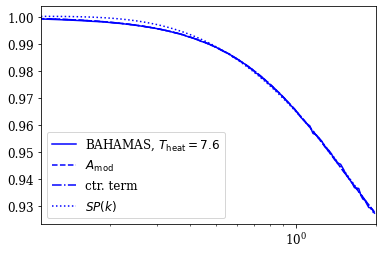

In [5]:
# Fits to BAHAMAS
k_bahamas_trunc = k_bahamas[idx_cowls][idx_krange]
plt.semilogx(k_bahamas_trunc, pk_ratio_bahamas, label=r'BAHAMAS, $T_{\rm heat}=7.6$', color='b')
bahamas_Amod, bahamas_cnl = curve_fit(A_mod_model, k_bahamas[idx_cowls][idx_krange], pk_ratio_bahamas, p0=[0.87, 1.1], maxfev=4000)[0]
bahamas_b, bahamas_R = curve_fit(counterterm_model, k_bahamas[idx_cowls][idx_krange], pk_ratio_bahamas, p0=[0.04, 0.67])[0]
print()
bahamas_spk_fit = curve_fit(spk_power_fn, k_bahamas[idx_cowls][idx_krange][idx_krange_2], pk_ratio_bahamas[idx_krange_2], p0=[0.6, 0.3])[0]

plt.semilogx(k_bahamas_trunc, A_mod_model(k_bahamas_trunc, bahamas_Amod, bahamas_cnl), label=r'$A_{\rm mod}$', color='b', ls='--')
plt.semilogx(k_bahamas_trunc, counterterm_model(k_bahamas_trunc, bahamas_b, bahamas_R), label=r'ctr. term', color='b', ls='-.')
plt.semilogx(k_bahamas_trunc[idx_krange_2], spk_power_fn(k_bahamas_trunc[idx_krange_2], bahamas_spk_fit[0], bahamas_spk_fit[1]), label=r'$SP(k)$', color='b', ls=':')
plt.xlim(min(k_bahamas_trunc[idx_krange_2]),2)
plt.legend()
plt.show()

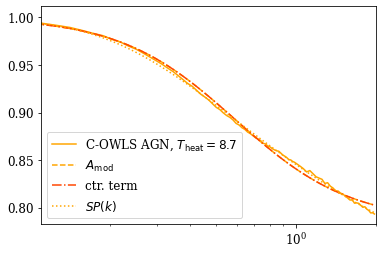

In [6]:
# Fits to C-OWLS
k_cowls_trunc = k_cowls[idx_cowls][idx_krange]
plt.semilogx(k_cowls_trunc, pk_ratio_cowls, label=r'C-OWLS AGN, $T_{\rm heat}=8.7$', color='orange')
cowls_Amod, cowls_cnl = curve_fit(A_mod_model, k_cowls[idx_cowls][idx_krange], pk_ratio_cowls, p0=[.4, 0.1])[0]

cowls_b, cowls_R = curve_fit(counterterm_model, k_cowls[idx_cowls][idx_krange], pk_ratio_cowls, p0=[0.17, 1.1])[0]
cowls_spk_fit = curve_fit(spk_power_fn, k_cowls[idx_cowls][idx_krange][idx_krange_2], pk_ratio_cowls[idx_krange_2], p0=[0.4, 0.3])[0]

plt.semilogx(k_cowls_trunc, A_mod_model(k_cowls_trunc, cowls_Amod, cowls_cnl), label=r'$A_{\rm mod}$', color='orange', ls='--')
plt.semilogx(k_cowls_trunc, counterterm_model(k_cowls_trunc, cowls_b, cowls_R), label=r'ctr. term', color='orangered', ls='-.')
plt.semilogx(k_cowls_trunc[idx_krange_2], spk_power_fn(k_cowls_trunc[idx_krange_2], cowls_spk_fit[0], cowls_spk_fit[1]), label=r'$SP(k)$', color='orange', ls=':')
plt.xlim(min(k_bahamas_trunc[idx_krange_2]),2)
plt.legend()
plt.show()

In [7]:
def c2and4(Rb):
    c2 = cowls_b/Rb**2
    c4 = cowls_b*cowls_R**2/Rb**4
    print(c2, c4)

c2and4(1.25)

0.3901229137966695 0.7079906110030806


0.2322630691963137 0.10445226152306067 1.4531253230339223


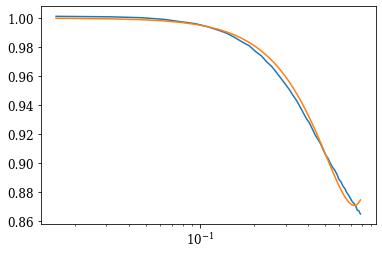

In [ ]:
def Taylor(k, c2, c4, Rb):
    return 1-c2*(k*Rb)**2+c4*(k*Rb)**4

plt.semilogx(k_cowls_trunc[:50], pk_ratio_cowls[:50])
c2_cowls, c4_cowls, Rb_Cowls = curve_fit(Taylor, k_cowls_trunc[:50], pk_ratio_cowls[:50], p0=[0.35, 1, 1.5])[0]
print(c2_cowls, c4_cowls, Rb_Cowls)
plt.semilogx(k_cowls_trunc[:50], Taylor(k_cowls_trunc[:50], c2_cowls, c4_cowls, Rb_Cowls))
plt.show()

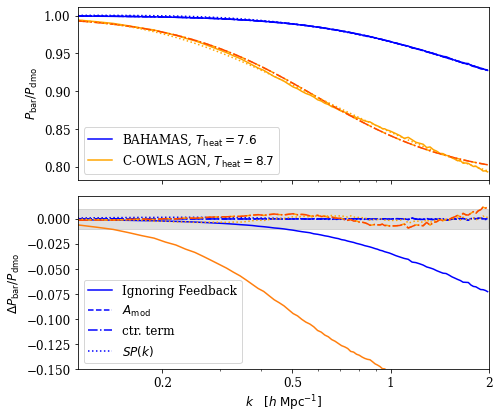

In [9]:
fig, axs = fig, ax = plt.subplots(2, 1, figsize=(7, 6), sharex=True)
axs[0].semilogx(k_bahamas_trunc, pk_ratio_bahamas, label=r'BAHAMAS, $T_{\rm heat}=7.6$', color='b')
axs[0].semilogx(k_bahamas_trunc, A_mod_model(k_bahamas_trunc, bahamas_Amod, bahamas_cnl), color='b', ls='--')
axs[0].semilogx(k_bahamas_trunc, counterterm_model(k_bahamas_trunc, bahamas_b, bahamas_R), color='b', ls='-.')
axs[0].semilogx(k_bahamas_trunc[idx_krange_2], spk_power_fn(k_bahamas_trunc[idx_krange_2], bahamas_spk_fit[0], bahamas_spk_fit[1]), color='b', ls=':')
axs[0].set_xlim(min(k_bahamas_trunc[idx_krange_2]),2)

axs[0].semilogx(k_cowls_trunc, pk_ratio_cowls, label=r'C-OWLS AGN, $T_{\rm heat}=8.7$', color='orange')
axs[0].semilogx(k_cowls_trunc, A_mod_model(k_cowls_trunc, cowls_Amod, cowls_cnl), color='orange', ls='--')
axs[0].semilogx(k_cowls_trunc, counterterm_model(k_cowls_trunc, cowls_b, cowls_R), color='orangered', ls='-.')
axs[0].semilogx(k_cowls_trunc[idx_krange_2], spk_power_fn(k_cowls_trunc[idx_krange_2], cowls_spk_fit[0], cowls_spk_fit[1]), color='orange', ls=':')
axs[0].set_ylabel(r'$P_{\rm bar}/P_{\rm dmo}$')
axs[0].legend()

axs[1].semilogx(k_bahamas_trunc, pk_ratio_bahamas-1, label='Ignoring Feedback', color='b')
axs[1].semilogx(k_bahamas_trunc, (A_mod_model(k_bahamas_trunc, bahamas_Amod, bahamas_cnl)-pk_ratio_bahamas)/pk_ratio_bahamas, label=r'$A_{\rm mod}$', color='b', ls='--')
axs[1].semilogx(k_bahamas_trunc, (counterterm_model(k_bahamas_trunc, bahamas_b, bahamas_R)-pk_ratio_bahamas)/pk_ratio_bahamas, label=r'ctr. term', color='b', ls='-.')
axs[1].semilogx(k_bahamas_trunc[idx_krange_2], (spk_power_fn(k_bahamas_trunc[idx_krange_2], bahamas_spk_fit[0], bahamas_spk_fit[1])-pk_ratio_bahamas[idx_krange_2])/pk_ratio_bahamas[idx_krange_2], label=r'$SP(k)$', color='b', ls=':')

axs[1].semilogx(k_cowls_trunc, pk_ratio_cowls-1, color='C1')
axs[1].semilogx(k_cowls_trunc, (A_mod_model(k_cowls_trunc, cowls_Amod, cowls_cnl)-pk_ratio_cowls)/pk_ratio_cowls, color='orange', ls='--')
axs[1].semilogx(k_cowls_trunc, (counterterm_model(k_cowls_trunc, cowls_b, cowls_R)-pk_ratio_cowls)/pk_ratio_cowls, color='orangered', ls='-.')
axs[1].semilogx(k_cowls_trunc[idx_krange_2], (spk_power_fn(k_cowls_trunc[idx_krange_2], cowls_spk_fit[0], cowls_spk_fit[1])-pk_ratio_cowls[idx_krange_2])/pk_ratio_cowls[idx_krange_2], color='orange', ls=':')

axs[1].set_ylabel(r'$\Delta P_{\rm bar}/P_{\rm dmo}$')
axs[1].set_xlabel(r'$k\quad[h\;{\rm Mpc}^{-1}]$')
axs[1].set_xticks([0.2,0.5,1,2])
axs[1].set_xticklabels(['0.2', '0.5', '1', '2'])
axs[1].set_ylim(-0.15, None)
axs[1].fill_between(k_cowls_trunc, -0.01,1e-2, color='gray', alpha=0.25)
axs[1].legend()

fig.tight_layout()
fig.savefig('figures/baryons.pdf')


In [10]:
np.savetxt('baryon_spectra/baryons_bahamas.txt', np.array([k_bahamas_trunc,
                                        pk_ratio_bahamas,
                                        A_mod_model(k_bahamas_trunc, bahamas_Amod, bahamas_cnl),
                                        counterterm_model(k_bahamas_trunc, bahamas_b, bahamas_R) 
                                        ]).T,
                                        header='k, measured, A_mod, ctr. term')

In [11]:
np.savetxt('baryon_spectra/baryons_cowls.txt', np.array([k_cowls_trunc,
                                        pk_ratio_cowls,
                                        A_mod_model(k_cowls_trunc, cowls_Amod, cowls_cnl),
                                        counterterm_model(k_cowls_trunc, cowls_b, cowls_R)
                                        ]).T,
                                        header='k, measured, A_mod, ctr. term')


In [12]:
np.savetxt('baryon_spectra/baryons_SPk.txt', np.array([k_bahamas_trunc[idx_krange_2],
                                        spk_power_fn(k_bahamas_trunc[idx_krange_2], bahamas_spk_fit[0], bahamas_spk_fit[1]),
                                        spk_power_fn(k_cowls_trunc[idx_krange_2], cowls_spk_fit[0], cowls_spk_fit[1])
                                        ]).T,
                                        header='k, bahamas, cowls')
